In [ ]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train (1).csv


In [ ]:
import pandas as pd
ti=pd.read_csv("train.csv")
ti.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
ti.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
ti.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [ ]:
predictors = ti.drop('Survived', axis = 'columns')
target = ti.Survived

In [ ]:
predictors['Sex'].replace(['female','male'],[0,1],inplace=True)
predictors.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [ ]:
target.head()


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
predictors.Age = predictors.Age.fillna(predictors.Age.mean())
predictors.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


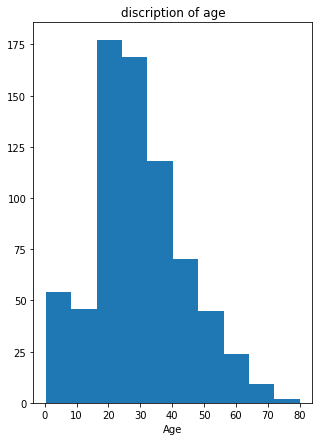

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,7))
plt.hist(ti["Age"])
plt.title("discription of age")
plt.xlabel("Age")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors,target,test_size=0.25)

In [ ]:
X_train

,Pclass,Sex,Age,Fare
575,3,1,19.0,14.5000
869,3,1,4.0,11.1333
603,3,1,44.0,8.0500
559,3,0,36.0,17.4000
746,3,1,16.0,20.2500
...,...,...,...,...
804,3,1,27.0,6.9750
619,2,1,26.0,10.5000
887,1,0,19.0,30.0000
397,2,1,46.0,26.0000


In [ ]:
y_train.head()

575    0
869    1
603    0
559    1
746    0
Name: Survived, dtype: int64

Text(0.5, 1.0, 'ti.corr()')

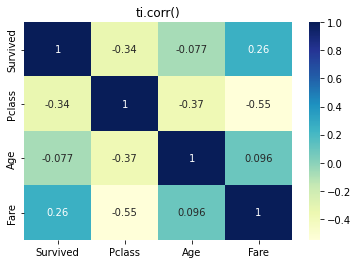

In [ ]:
sns.heatmap(ti.corr(),cmap='YlGnBu',xticklabels=True,annot=True)
plt.title('ti.corr()')


In [ ]:
import numpy as np

class NaiveBayes:
  def fit(self,X,y):
    self.n_samples, self.n_features=X.shape
    self._classes=np.unique(y)
    self.n_classes=len(self._classes)
    self._mean=np.zeros((self.n_classes, self.n_features), dtype=np.float64)
    self.mean = np.zeros((self.n_classes, self.n_features))
    self._var=np.zeros((self.n_classes, self.n_features), dtype=np.float64)
    self._priors=np.zeros(self.n_classes, dtype=np.float64)

    for c in self._classes:
      X_c=X[c==y]
      self._mean[c,:]=X_c.mean(axis=0)
      self._var[c,:]=X_c.mean(axis=0)
      self._priors[c]=X_c.shape[0] / float(self.n_samples)
  def _predict(self,X):
    y_pred=[self._pridict(x) for x in X]
    return y_pred
  def _predict(self,x):
    posteriors=[]

    for idx,c in enumerate(self._classes):
      prior=np.log(self._priors[idx])
      class_conditional=np.sum(np.log(self._pdf(idx,x)))
      posterior=prior + class_conditional
      posteriors.append(posterior)

    return self._classes[np.argmax(posteriors)]
  def _pdf(self,class_idx,x):
    mean=self.mean[class_idx]
    var=self._var[class_idx]
    numerator=np.exp(-(x-mean)**2 / (2*var))
    denominator=np.sqrt(2*np.pi * var)
    return numerator / denominator


 

In [ ]:
model = NaiveBayes()
model.fit(X_train,y_train)
model._predict(X_test)

0.7802690582959642

In [ ]:
X_test[:10]

,Pclass,Sex,Age,Fare
526,2,0,50.000000,10.5000
541,3,0,9.000000,31.2750
102,1,1,21.000000,77.2875
754,2,0,48.000000,65.0000
282,3,1,16.000000,9.5000
66,2,0,29.000000,10.5000
382,3,1,32.000000,7.9250
321,3,1,27.000000,7.8958
836,3,1,21.000000,8.6625
384,3,1,29.699118,7.8958


In [ ]:
y_test[:10]

526    1
541    0
102    0
754    1
282    0
66     1
382    0
321    0
836    0
384    0
Name: Survived, dtype: int64

In [ ]:
model.predict(X_test[:10])

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0])